# Prosper Loan Data Analysis

### Dataset
The dataset contains 113,937 Loan Data from Prosper with 81 variables. 

### Investigation overview: 
In this investigation, I wanted to look at the features of Prosper loan that could be used to predict their borrower APR.

In [1]:
# import packages and libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

# load dataset into a pandas datafram
loan = pd.read_csv('prosperLoanData.csv')

# load variable definition
var_def = pd.read_csv('Prosper Loan Data - Variable Definitions - Sheet1.csv')

## Distribution of Loan Term

Terms of the loans are 12, 36 or 60 months. The majority of the loan in this dataset are 36 months

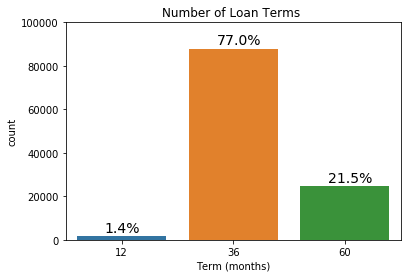

In [2]:

# show the stats of Loan terms. 
ax = sb.countplot(data=loan, x='Term')
plt.title('Number of Loan Terms ')
plt.xlabel('Term (months)')
total = len(loan['Term'])
plt.ylim(0,100000)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 -0.15
        y = p.get_y() + p.get_height()+2000
        ax.annotate(percentage, (x, y),fontsize=14)
        
plt.show()

## Distribution of borrower APR

Borrower APR in the dataset take on values range from about 0.05 at the lowest, to about 0.42 at the highest. The distribution of borrower APR takes a multimodal shape.

Distribution of borrower APR

The average borrower APR is 0.218827655909788


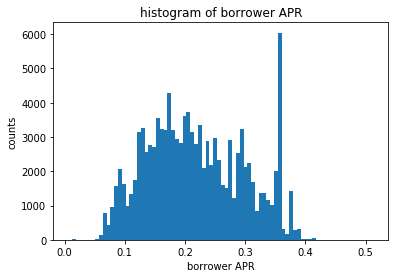

In [3]:
avg_apr = loan['BorrowerAPR'].mean()


print('Distribution of borrower APR')
print('')
print('The average borrower APR is '+str(avg_apr))

# The check the distribution of APR
plt.hist(loan['BorrowerAPR'],density=False,bins = 80)
plt.ylabel('counts')
plt.xlabel('borrower APR')
plt.title('histogram of borrower APR')
plt.show()



## How variables that doesn't relate to the borrower influence loan annual rate?

In [4]:
# select variables for exploration
cols_idx = [7, 4, 17, 63, 65]

# generate dataframe 
df = loan[var_def['Variable'].iloc[cols_idx]]
df.head()

,BorrowerAPR,Term,BorrowerState,LoanOriginalAmount,LoanOriginationQuarter
0,0.16516,36,CO,9425,Q3 2007
1,0.12016,36,CO,10000,Q1 2014
2,0.28269,36,GA,3001,Q1 2007
3,0.12528,36,GA,10000,Q4 2012
4,0.24614,36,MN,15000,Q3 2013


## Terms vs. Borrower APR
Plotting borrower APR on the axis of loan term, we found that loan with longer term have lower APR than those with shorter Term. 

The APR for the loan with 60 months term shows different pattern of distribution, compared to loans of 12 or 36 months term. 


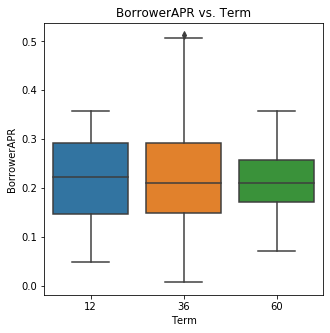

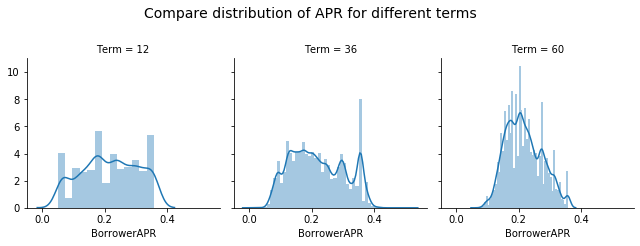

In [5]:
# boxplot for 'Term' and 'BorrowerAPR'
fig, ax = plt.subplots(figsize=(5,5))
sb.boxplot(data = df, x = 'Term', y = 'BorrowerAPR')
plt.title('BorrowerAPR vs. Term')

plt.show()

# check distribution difference for different Term
g = sb.FacetGrid(df, col="Term")
g.map(sb.distplot, "BorrowerAPR")
plt.text(-1,14,'Compare distribution of APR for different terms',fontsize=14)
plt.show()

## Loan Original Amount vs. Borrower APR

Plotting borrower APR on the axis of loan original amount indicates strong negative correlation between those two variables. 

The higher the loan original amount the higher borrower APR is. We also found that the loan original amount seems lower for loan with 12 months term.¶

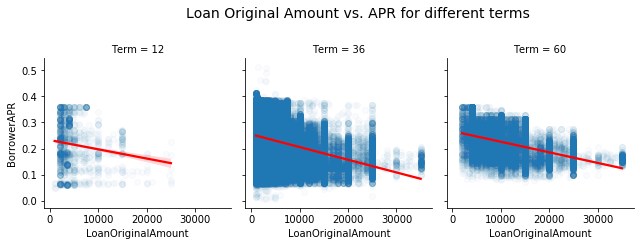

In [6]:
# FacetGrid to make scatter plot for 'LoanOriginalAmount' and 'BorrowerAPR'for different terms
g = sb.FacetGrid(df, col="Term")
g.map(sb.regplot, "LoanOriginalAmount", "BorrowerAPR",scatter_kws={'alpha':1/40},line_kws={"color": "red"})
plt.text(-55000,0.7,'Loan Original Amount vs. APR for different terms',fontsize=14)
plt.show()

## Borrower State vs. Borrower APR
We plot the borrower APR by different state. 
Some states, i.e. AL and AR, have higher average APR than other states. The 3 states with the lowest APR are DC, ME and IA.

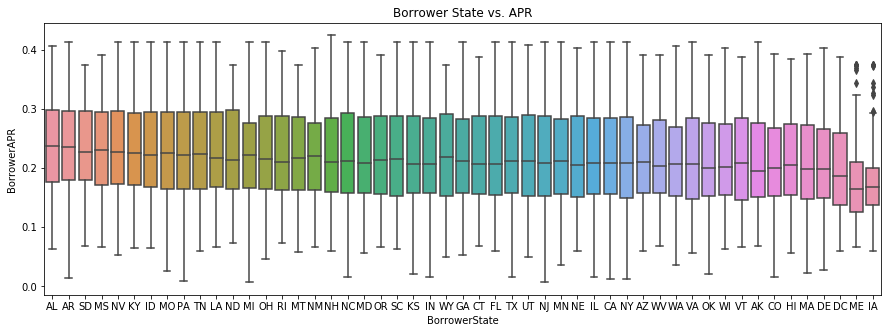

In [7]:
# boxplot for 'BorrowerState' and 'BorrowerAPR'
order_state = df.groupby('BorrowerState').mean().sort_values(by='BorrowerAPR', ascending=False).index
fig, ax = plt.subplots(figsize=(15,5))
sb.boxplot(data = df, x = 'BorrowerState', y = 'BorrowerAPR', ax=ax, order = order_state)
plt.title('Borrower State vs. APR')
plt.show()

### How Borrower APR chenges with time?
the borrower APR flactuated with time, but there is no fixed tend. The APR is not alway increase or decrease with time. and it also seems not so correlated with quarter, such that loan in quarter 1 does not alway lower than the other quarters. Therefore, although date of the loan correlates with the APR, it may not be a good feature to make prediction of the APR.

In [8]:
# convert LoanOriginationQuarter to an value, i.e 2007.1 stands for Q1 2007
Quarter = df['LoanOriginationQuarter'].str.rsplit(n=1, expand=True)
Quarter_val = Quarter[1].astype(int) + Quarter[0].str[-1].astype(int)*0.1

df['LOQuarter'] = Quarter_val
df.head()

,BorrowerAPR,Term,BorrowerState,LoanOriginalAmount,LoanOriginationQuarter,LOQuarter
0,0.16516,36,CO,9425,Q3 2007,2007.3
1,0.12016,36,CO,10000,Q1 2014,2014.1
2,0.28269,36,GA,3001,Q1 2007,2007.1
3,0.12528,36,GA,10000,Q4 2012,2012.4
4,0.24614,36,MN,15000,Q3 2013,2013.3


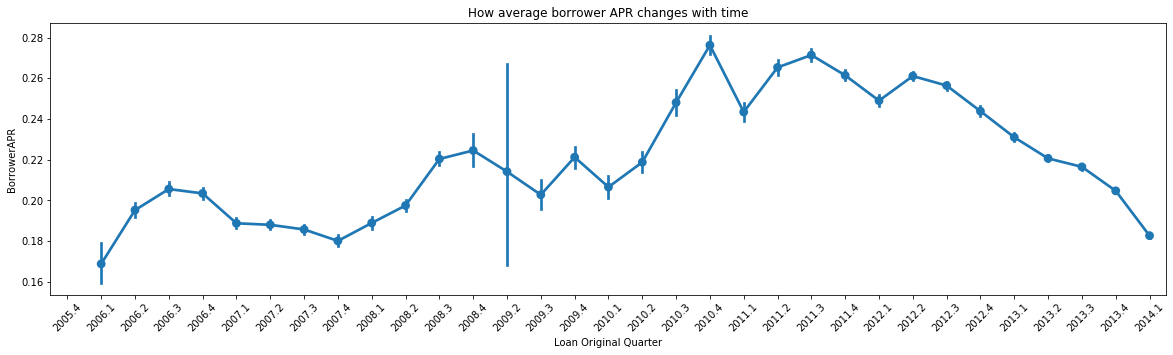

i.e. 2007.1 stands for 2007 Q1


In [9]:
# make a point plot for BorrowerAPR as a function of Loan Original Quarter
fig, ax = plt.subplots(figsize=(20,5))
sb.pointplot(data=df, x='LOQuarter',y='BorrowerAPR')
plt.title('How average borrower APR changes with time')
plt.xticks(rotation=45)
plt.xlabel('Loan Original Quarter')
plt.show()

print('i.e. 2007.1 stands for 2007 Q1')

In [10]:
# select variables for exploration
cols_idx = [7, 13, 15, 19, 21, 35, 47, 51]

# generate dataframe 
df2 = loan[var_def['Variable'].iloc[cols_idx]]
df2.head()

,BorrowerAPR,ProsperRating (numeric),ProsperScore,EmploymentStatus,IsBorrowerHomeowner,CurrentDelinquencies,IncomeRange,TotalProsperLoans
0,0.16516,NaN,NaN,Self-employed,True,2.0,"$25,000-49,999",NaN
1,0.12016,6.0,7.0,Employed,False,0.0,"$50,000-74,999",NaN
2,0.28269,NaN,NaN,Not available,False,1.0,Not displayed,NaN
3,0.12528,6.0,9.0,Employed,True,4.0,"$25,000-49,999",NaN
4,0.24614,3.0,4.0,Employed,True,0.0,"$100,000+",1.0


In [11]:
# drop rows has no APR value
df2=df2[~df2['BorrowerAPR'].isnull()]  
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   BorrowerAPR              113912 non-null  float64
 1   ProsperRating (numeric)  84853 non-null   float64
 2   ProsperScore             84853 non-null   float64
 3   EmploymentStatus         111682 non-null  object 
 4   IsBorrowerHomeowner      113912 non-null  bool   
 5   CurrentDelinquencies     113240 non-null  float64
 6   IncomeRange              113912 non-null  object 
 7   TotalProsperLoans        22085 non-null   float64
dtypes: bool(1), float64(5), object(2)
memory usage: 7.1+ MB


In [12]:
df2.describe()

,BorrowerAPR,ProsperRating (numeric),ProsperScore,CurrentDelinquencies,TotalProsperLoans
count,113912.000000,84853.000000,84853.000000,113240.000000,22085.000000
mean,0.218828,4.072243,5.950067,0.592052,1.421100
std,0.080364,1.673227,2.376501,1.978707,0.764042
min,0.006530,1.000000,1.000000,0.000000,0.000000
25%,0.156290,3.000000,4.000000,0.000000,1.000000
50%,0.209760,4.000000,6.000000,0.000000,1.000000
75%,0.283810,5.000000,8.000000,0.000000,2.000000
max,0.512290,7.000000,11.000000,83.000000,8.000000


## Prosper Rating vs. Score 

Prosper Score: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  
Prosper rating is a similar parameter to evaluate a customer’s risk. 

We made a 2d histogram for Prosper score and rating. The figure shows that, for most of the scores, Prosper scores are positive correlated with Prosper rating. However, there are loans with high prosper score but low prosper rating.

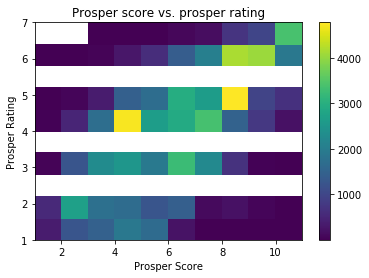

In [13]:
# make plot to see how those two relate to each other
df2u = df2[~df2['ProsperScore'].isnull()]  
plt.hist2d(df2u['ProsperScore'], df2u['ProsperRating (numeric)'],cmin=1)
plt.xlabel('Prosper Score')
plt.ylabel('Prosper Rating')
plt.title('Prosper score vs. prosper rating')
plt.colorbar()
plt.show()

## Prosper Rating/Score vs. Borrower APR

We can see how borrower APR changes with Prosper score and Prosper rating. Both of the variables are strongly nagative correlated with APR. Borrowers with high Prosper score and rating, tends to have relatively low APR. 

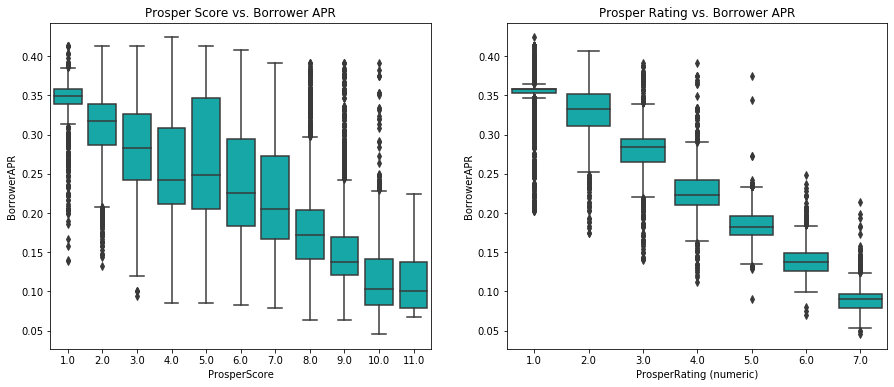

In [14]:
# bar plor to show how APR changes with Prosper score /Rating
fig, ax = plt.subplots(1,2,figsize=(15,6))
sb.boxplot(data=df2u,x='ProsperScore',y='BorrowerAPR',ax=ax[0],color='c')
ax[0].set_title('Prosper Score vs. Borrower APR')
sb.boxplot(data=df2u,x='ProsperRating (numeric)',y='BorrowerAPR',ax=ax[1],color='c')
ax[1].set_title('Prosper Rating vs. Borrower APR')
plt.show()

## Employment Status vs. APR
## Is Borrower Homeowner vs. APR

We can see how employment status and homeowning conditions affect borrower APR by plotting the average APR on selected borrower conditions. 
Not-employed borrowers have relative higher APR than employed borrower. and borrowers that own home have relative lower APR than those don't own home. 

Except for not employed borrower, borrower owning home have lower APR than borrowers not owning home.
It is worth noting that both 'employment status' and 'IsBorrowerHomeowner' might be correlated with Prosper rating/score. We will check this in the following part. Since Prosper Rating is positive correlated with Prosper score, here we only plot Prosper Rating.

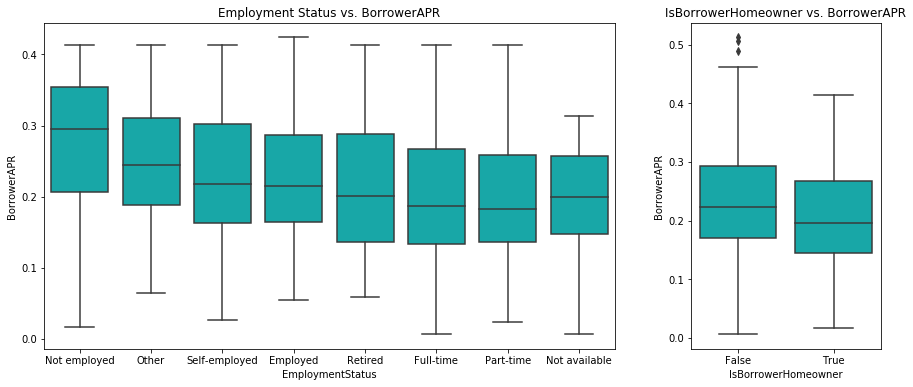

In [15]:
# bar plot to show how APR changes with 'EmploymentStatus' or 'IsBorrowerHomeowner'
fig, ax = plt.subplots(1,2,figsize=(15,6),gridspec_kw={'width_ratios': [3, 1]})
order_SE = df2.groupby('EmploymentStatus').mean().sort_values(by='BorrowerAPR', ascending=False).index
sb.boxplot(data=df2,x='EmploymentStatus',y='BorrowerAPR',ax=ax[0],color='c',order=order_SE)
ax[0].set_title('Employment Status vs. BorrowerAPR')
sb.boxplot(data=df2,x='IsBorrowerHomeowner',y='BorrowerAPR',ax=ax[1],color='c')
ax[1].set_title('IsBorrowerHomeowner vs. BorrowerAPR')
plt.show() 

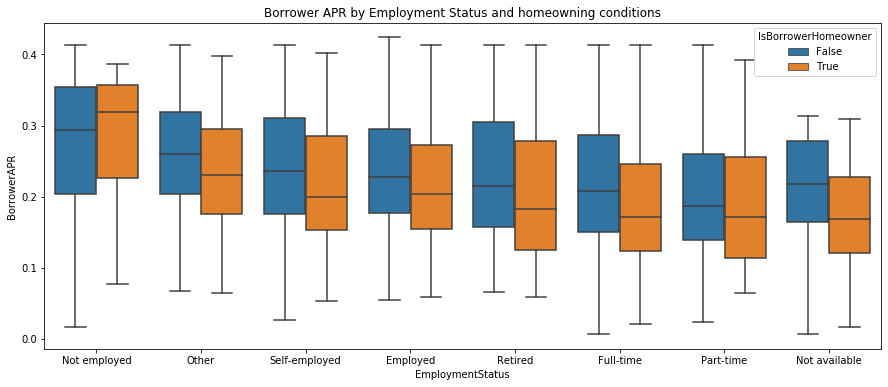

In [16]:
# box plot 
fig, ax = plt.subplots(figsize=(15,6))
sb.boxplot(data=df2,x='EmploymentStatus',y='BorrowerAPR',hue='IsBorrowerHomeowner',order=order_SE)
plt.title('Borrower APR by Employment Status and homeowning conditions')
plt.show()


## Score vs. borrower status
As we expected, not employed borrowers are rated with lower score than employed borrowers. For homeowner condition, except for not employed borrowers that have higher score for non-homeowner, borrowers owning home are rated with higher score.

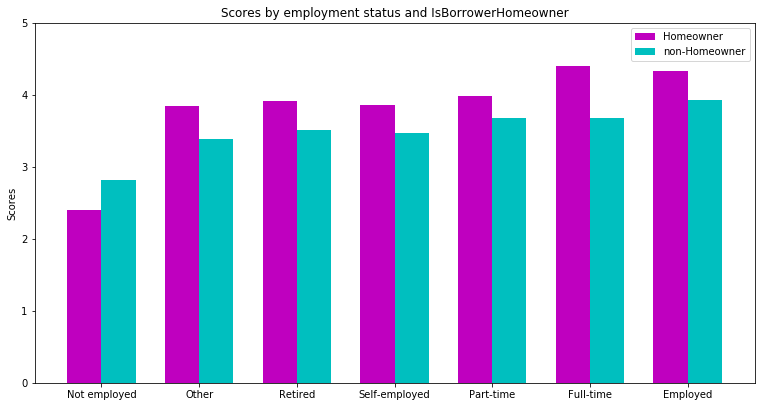

In [17]:
# plot Prosper rating by 'employment status' and 'IsBorrowerHomeowner'
rating_mean = df2u.groupby(['IsBorrowerHomeowner','EmploymentStatus']).mean()['ProsperRating (numeric)']
Homeowner_Means = rating_mean[1][[2,3,5,6,4,1,0]]
nonHomeowner_Means=rating_mean[0][[2,3,5,6,4,1,0]]

ind = np.arange(len(rating_mean[0])) # the x locations for the groups
width = 0.35
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, Homeowner_Means, width, color='m')
ax.bar(ind+width, nonHomeowner_Means, width,color='c')
ax.set_ylabel('Scores')
ax.set_title('Scores by employment status and IsBorrowerHomeowner')

labels = ['Not employed', 'Other', 'Retired', 'Self-employed', 'Part-time',
       'Full-time', 'Employed']
ax.set_xticks(ind+width/2)
ax.set_xticklabels(labels)
ax.set_yticks(np.arange(0, 6, 1))
ax.legend(labels=['Homeowner', 'non-Homeowner'],loc='upper right')
plt.show()

In [18]:
df2u = df2[~df2['CurrentDelinquencies'].isnull()]
df2u.describe()

,BorrowerAPR,ProsperRating (numeric),ProsperScore,CurrentDelinquencies,TotalProsperLoans
count,113240.000000,84853.000000,84853.000000,113240.000000,22085.000000
mean,0.219025,4.072243,5.950067,0.592052,1.421100
std,0.080300,1.673227,2.376501,1.978707,0.764042
min,0.006530,1.000000,1.000000,0.000000,0.000000
25%,0.156290,3.000000,4.000000,0.000000,1.000000
50%,0.209840,4.000000,6.000000,0.000000,1.000000
75%,0.283860,5.000000,8.000000,0.000000,2.000000
max,0.423950,7.000000,11.000000,83.000000,8.000000


## Current Delinquencies vs. APR

Plotting borrower APR as a function current delinquencies shows an positive correlation between those two variables. Borrowers with high Current Delinquencies has high borrower APR. 



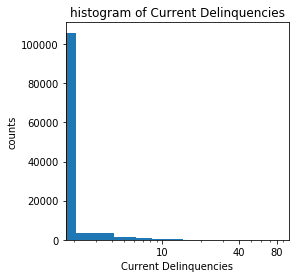

The majority of the borrowers have less than 2 current delinquencies.


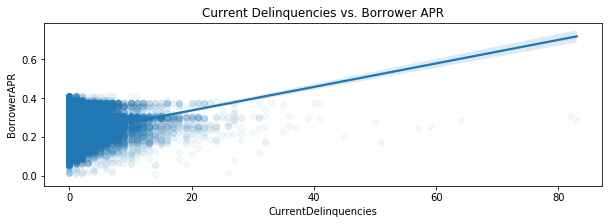

In [19]:
# make histogram for 'CurrentDelinquencies'
fig,ax=plt.subplots(figsize=(4,4))
plt.hist(df2u['CurrentDelinquencies'],bins= 40)
plt.title('histogram of Current Delinquencies')
plt.xlabel('Current Delinquencies')
plt.ylabel('counts')
ax.set_xscale('log')
ax.set_xticks([10, 40, 80])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.show()

print('The majority of the borrowers have less than 2 current delinquencies.')

# make scatter plot for CurrentDelinquencies and borrowerAPR
fig,ax=plt.subplots(figsize=(10,3))
sb.regplot(data=df2u,x='CurrentDelinquencies',y='BorrowerAPR',scatter_kws={'alpha':1/20},ax=ax)
plt.title('Current Delinquencies vs. Borrower APR')
plt.show()

## Income range vs APR

we found that the income of the borrower are negatively correlated with APR. not employed borrowers have relatively higher APR than the others. 

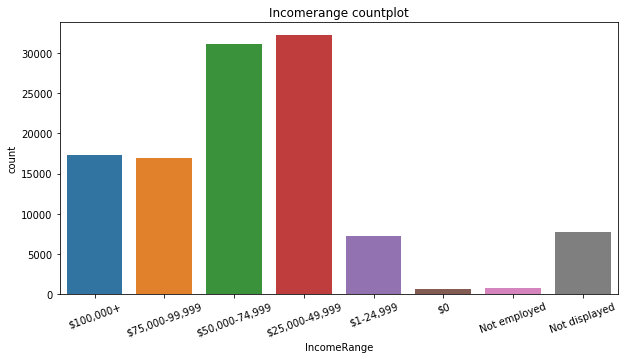

In [21]:
# count plot for incomrange
IncomeRange = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999',
        '$1-24,999',  '$0', 'Not employed', 'Not displayed']
fig,ax=plt.subplots(figsize=(10,5))
sb.countplot(data=df2,x='IncomeRange',order=IncomeRange)
plt.xticks(rotation=20)
plt.title('Incomerange countplot')
plt.show()

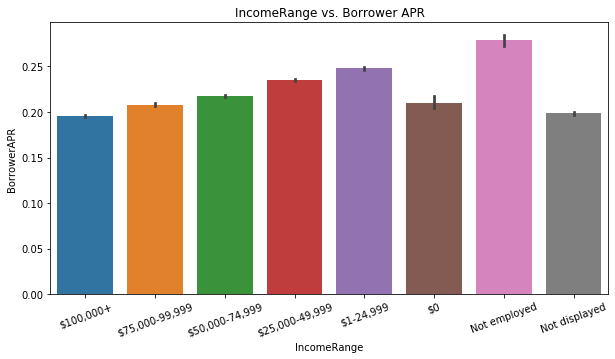

In [22]:
# bar plot for Incomerange vs. APR
fig,ax=plt.subplots(figsize=(10,5))
sb.barplot(data=df2,x='IncomeRange',y='BorrowerAPR',order=IncomeRange)
plt.xticks(rotation=20)
plt.title('IncomeRange vs. Borrower APR')
plt.show()

##  Total Prosper Loans vs. APR

We plot the borrower APR on tha axis of total Prosper Loans. The figure shows that the more Prosper loans the borrower have, the lower APR they will have. 




In [23]:
# replace NaN with 0.
df2['TotalProsperLoans'].replace({np.nan:0},inplace=True)
df2['TotalProsperLoans']

0         0.0
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
113932    0.0
113933    3.0
113934    0.0
113935    1.0
113936    0.0
Name: TotalProsperLoans, Length: 113912, dtype: float64

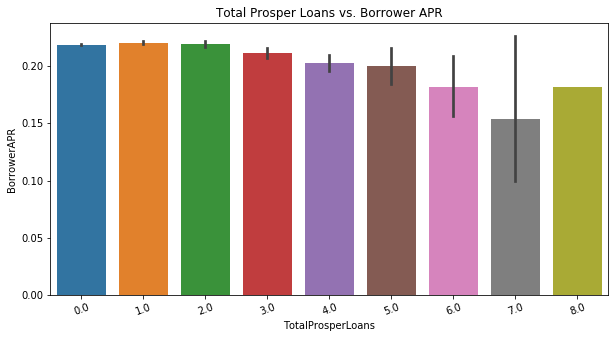

In [25]:
# bar plot for TotalProsperLoans vs. APR
fig,ax=plt.subplots(figsize=(10,5))
sb.barplot(data=df2,x='TotalProsperLoans',y='BorrowerAPR')
plt.xticks(rotation=20)
plt.title('Total Prosper Loans vs. Borrower APR')
plt.show()

## To sum up:

Among our selected variables, we explored how borrower and borrower-non-related bariables influence APR. 

We found that  among borrower-non-related variables,term, loan original amount and state might be good features to make APR prediction.

For borrower related variables, we found that borrower rating/score, employment status, whether a homeowner, current delinquencies, income range and total Prosper loans are correlated with borrower APR. 

Some variables are correlated with each other, such Prosper rating and employment status. 


